<a href="https://colab.research.google.com/github/Irenekayla/Udacity-Projects/blob/main/P1_image_classifier_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## AI Programming with Python Nanodegree: Image Classifier Project
  - Do not make changes to the first 2 code cells, they are being used for setting up the `flowers` dataset and `cat_to_name.json`. Start writing code from third code cell onwards.
  - To use this notebook: `File > Save a copy in Drive`
  

### Code Explanation:

- **Setting Up Flower Dataset:**
  - `data_dir = './flowers'`: Defines the directory path for the flower dataset.
  - `FLOWERS_DIR = Path(data_dir)`: Uses `Path` from `pathlib` for handling PosixPath.

- **Downloading and Extracting Dataset:**
  - `if not FLOWERS_DIR.is_dir()`: Checks if the dataset directory exists.
    - `FLOWERS_DIR.mkdir(parents=True, exist_ok=True)`: Creates the directory if not present.
  - `TARBALL = FLOWERS_DIR / "flower_data.tar.gz"`: Defines the tarball path.
  - Downloads and extracts the dataset if not already present:
    - `request = requests.get(...)`: Downloads the 'flower_data.tar.gz' file.
    - `with open(TARBALL, "wb") as file_ref`: Writes the downloaded content to the tarball.
    - `with tarfile.open(TARBALL, "r") as tar_ref`: Extracts the tarball contents to the dataset directory.

- **Cleaning Up:**
  - `os.remove(TARBALL)`: Deletes the downloaded tarball to save space.

- **Status Messages:**
  - Prints informative messages about the directory creation, download, extraction, and cleanup.


In [20]:
# imports
import os
import requests
from pathlib import Path
import tarfile

# defining dataset directory
data_dir = './flowers'

# using pathlib.Path for handling PosixPath
FLOWERS_DIR = Path(data_dir)

# downloading and setting up data if not already present
if not FLOWERS_DIR.is_dir():
    # creating directory
    FLOWERS_DIR.mkdir(parents=True, exist_ok=True)
    print(f"[INFO] Directory created: ./{FLOWERS_DIR}")

    print() # for readability

    # tarball path
    TARBALL = FLOWERS_DIR / "flower_data.tar.gz"

    # downloading and writing the tarball to './flowers' directory
    print(f"[INFO] Downloading the file 'flower_data.tar.gz' to ./{FLOWERS_DIR}")
    request = requests.get('https://s3.amazonaws.com/content.udacity-data.com/nd089/flower_data.tar.gz')
    with open(TARBALL, "wb") as file_ref:
        file_ref.write(request.content)
        print(f"[INFO] 'flower_data.tar.gz' saved to ./{FLOWERS_DIR}")

    print() # for readability

    # extracting the downloaded tarball
    print(f"[INFO] Extracting the downloaded tarball to ./{FLOWERS_DIR}")
    with tarfile.open(TARBALL, "r") as tar_ref:
        tar_ref.extractall(FLOWERS_DIR)
        print(f"[INFO] 'flower_data.tar.gz' extracted successfully to ./{FLOWERS_DIR}")

    print() # for readability

    # using os.remove to delete the downloaded tarball
    print("[INFO] Deleting the tarball to save space.")
    os.remove(TARBALL)
else:
    print(f"[INFO] Dataset already setup at ./{FLOWERS_DIR}")

[INFO] Dataset already setup at ./flowers


### Code Explanation:

- **Creating a JSON File for Flower Categories:**
  - `data`: Defines a dictionary containing numerical keys and corresponding flower names.
  - `with open('cat_to_name.json', 'w') as file`: Opens the file 'cat_to_name.json' for writing.
  - `json.dump(data, file)`: Writes the dictionary data to the JSON file.

- **Interpreting the Output:**
  - The code creates a JSON file named 'cat_to_name.json' that serves as a mapping between numerical keys and flower names. This mapping can be useful for associating numerical labels with human-readable names in machine learning tasks.


In [21]:
import json

data = {
    "21": "fire lily", "3": "canterbury bells", "45": "bolero deep blue", "1": "pink primrose", "34": "mexican aster",
    "27": "prince of wales feathers", "7": "moon orchid", "16": "globe-flower", "25": "grape hyacinth", "26": "corn poppy",
    "79": "toad lily", "39": "siam tulip", "24": "red ginger", "67": "spring crocus", "35": "alpine sea holly",
    "32": "garden phlox", "10": "globe thistle", "6": "tiger lily", "93": "ball moss", "33": "love in the mist",
    "9": "monkshood", "102": "blackberry lily", "14": "spear thistle", "19": "balloon flower", "100": "blanket flower",
    "13": "king protea", "49": "oxeye daisy", "15": "yellow iris", "61": "cautleya spicata", "31": "carnation",
    "64": "silverbush", "68": "bearded iris", "63": "black-eyed susan", "69": "windflower", "62": "japanese anemone",
    "20": "giant white arum lily", "38": "great masterwort", "4": "sweet pea", "86": "tree mallow",
    "101": "trumpet creeper", "42": "daffodil", "22": "pincushion flower", "2": "hard-leaved pocket orchid",
    "54": "sunflower", "66": "osteospermum", "70": "tree poppy", "85": "desert-rose", "99": "bromelia", "87": "magnolia",
    "5": "english marigold", "92": "bee balm", "28": "stemless gentian", "97": "mallow", "57": "gaura",
    "40": "lenten rose", "47": "marigold", "59": "orange dahlia", "48": "buttercup", "55": "pelargonium",
    "36": "ruby-lipped cattleya", "91": "hippeastrum", "29": "artichoke", "71": "gazania", "90": "canna lily",
    "18": "peruvian lily", "98": "mexican petunia", "8": "bird of paradise", "30": "sweet william",
    "17": "purple coneflower", "52": "wild pansy", "84": "columbine", "12": "colt's foot", "11": "snapdragon",
    "96": "camellia", "23": "fritillary", "50": "common dandelion", "44": "poinsettia", "53": "primula",
    "72": "azalea", "65": "californian poppy", "80": "anthurium", "76": "morning glory", "37": "cape flower",
    "56": "bishop of llandaff", "60": "pink-yellow dahlia", "82": "clematis", "58": "geranium", "75": "thorn apple",
    "41": "barbeton daisy", "95": "bougainvillea", "43": "sword lily", "83": "hibiscus", "78": "lotus lotus",
    "88": "cyclamen", "94": "foxglove", "81": "frangipani", "74": "rose", "89": "watercress", "73": "water lily",
    "46": "wallflower", "77": "passion flower", "51": "petunia"
}

with open('cat_to_name.json', 'w') as file:
    json.dump(data, file)

In [29]:
import torch
from torchvision import datasets, transforms
from torch import nn, optim
from collections import OrderedDict
from torchvision import models  # Import the 'models' module

In [23]:
data_dir = 'flowers'
train_dir = os.path.join(data_dir, 'train')
valid_dir = os.path.join(data_dir, 'valid')
test_dir = os.path.join(data_dir, 'test')



In [24]:
mean = [0.485, 0.456, 0.406]
stdev = [0.229, 0.224, 0.225]

In [25]:
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize(mean, stdev)])

test_transforms = transforms.Compose([transforms.Resize(256),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean, stdev)])

validation_transforms = transforms.Compose([transforms.Resize(256),
                                            transforms.CenterCrop(224),
                                            transforms.ToTensor(),
                                            transforms.Normalize(mean, stdev)])

data_transforms = {
    'train': train_transforms,
    'test': test_transforms,
    'valid': validation_transforms
}

image_datasets = {
    'train': datasets.ImageFolder(train_dir, transform=train_transforms),
    'test': datasets.ImageFolder(test_dir, transform=test_transforms),
    'valid': datasets.ImageFolder(valid_dir, transform=validation_transforms)
}

dataloaders = {
    'train': torch.utils.data.DataLoader(image_datasets['train'], 128, shuffle=True),
    'test': torch.utils.data.DataLoader(image_datasets['test'], 32, shuffle=True),
    'valid': torch.utils.data.DataLoader(image_datasets['valid'], 32, shuffle=True)
}

In [26]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [27]:
import json
with open('cat_to_name.json', 'r') as f:
    cat_to_name = json.load(f)

In [38]:
model = models.resnet18(pretrained=True)
print(model)  # This will print the model's structure

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [49]:
epochs = 5
drop_prob = 0.1
hidden_dim = 1024
output_dim = len(cat_to_name)
print_every = 10

def build_network():
    model = models.resnet50(pretrained=True)
    for param in model.parameters():
        param.requires_grad = False

    classifier = nn.Sequential(
        nn.Linear(model.fc.in_features, hidden_dim),
        nn.ReLU(),
        nn.Dropout(drop_prob),
        nn.Linear(hidden_dim, output_dim),
        nn.LogSoftmax(dim=1)
    )

    model.fc = classifier
    model.cuda()

    return model

clf_nn = build_network()

criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(clf_nn.fc.parameters())

def train(epochs, print_every):
    clf_nn.to('cuda')
    steps = 0
    for e in range(epochs):
        running_loss = 0
        print(f"Epoch {e + 1} -------------------------------------------")
        for imgs, labels in dataloaders['train']:
            steps += 1
            imgs, labels = imgs.to('cuda'), labels.to('cuda')

            optimizer.zero_grad()

            outputs = clf_nn.forward(imgs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            if(steps % print_every == 0):
                t_loss = running_loss / print_every
                v_loss, v_acc = validate(dataloaders['valid'])
                print(f"Training Loss: {t_loss:.4f} Validation Loss: {v_loss:.4f} Validation Acc: {v_acc:.4f}")
                running_loss = 0

def validate(dataloader):
    loss = 0
    acc = 0
    clf_nn.to('cuda')
    for imgs, labels in dataloader:
        imgs, labels = imgs.to('cuda'), labels.to('cuda')

        with torch.no_grad():
            outputs = clf_nn.forward(imgs)
            loss += criterion(outputs, labels)
            preds = torch.exp(outputs).data

            equality = (labels.data == preds.max(1)[1])
            acc += equality.type_as(torch.FloatTensor()).mean()
    loss /= len(dataloader)
    acc /= len(dataloader)

    return loss, acc

train(epochs, print_every)

Epoch 1 -------------------------------------------
Training Loss: 4.3821 Validation Loss: 3.8873 Validation Acc: 0.1717
Training Loss: 3.6164 Validation Loss: 3.1192 Validation Acc: 0.3873
Training Loss: 3.0313 Validation Loss: 2.5275 Validation Acc: 0.4712
Training Loss: 2.4449 Validation Loss: 1.9153 Validation Acc: 0.5381
Training Loss: 1.9910 Validation Loss: 1.6019 Validation Acc: 0.6392
Epoch 2 -------------------------------------------
Training Loss: 1.3368 Validation Loss: 1.3425 Validation Acc: 0.6972
Training Loss: 1.4261 Validation Loss: 1.1264 Validation Acc: 0.7441
Training Loss: 1.2243 Validation Loss: 0.9594 Validation Acc: 0.7780
Training Loss: 1.0746 Validation Loss: 0.9038 Validation Acc: 0.7819
Training Loss: 1.0010 Validation Loss: 0.7675 Validation Acc: 0.8148
Epoch 3 -------------------------------------------
Training Loss: 0.5296 Validation Loss: 0.7485 Validation Acc: 0.8226
Training Loss: 0.9304 Validation Loss: 0.6994 Validation Acc: 0.8263
Training Loss: 0

In [50]:
def check_accuracy_on_test(testloader):
    correct = 0
    total = 0
    clf_nn.eval()
    clf_nn.to('cuda')
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.to('cuda'), labels.to('cuda')
            outputs = clf_nn(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy achieved: %d %%' % (100 * correct / total))

check_accuracy_on_test(dataloaders['test'])


Accuracy of the network on the test images: 89 %


In [51]:
# Save the checkpoint
clf_nn.class_to_idx = image_datasets['train'].class_to_idx
clf_nn.cpu()

checkpoint = {
    'arch': 'resnet18',
    'hidden_dim': hidden_dim,
    'output_dim': output_dim,
    'class_to_idx': clf_nn.class_to_idx,
    'state_dict': clf_nn.state_dict()
}

torch.save(checkpoint, 'checkpoint_resnet18.pth')


In [52]:
def load_pretrained_model(model_path):
    checkpoint = torch.load(model_path)
    model = build_network()
    model.class_to_idx = checkpoint['class_to_idx']
    model.load_state_dict(checkpoint['state_dict'])
    return model

pretrained_model = load_pretrained_model('./checkpoint_resnet18.pth')

<ipython-input-52-4c2940e0b7c3>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path)


<Axes: >

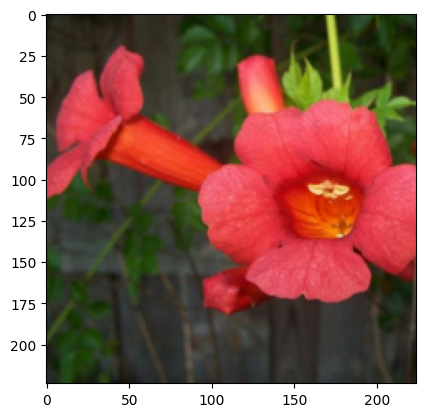

In [66]:
# Image Preprocessing
def process_image(image_path):
    ''' Scales, crops, and normalizes a PIL image for a PyTorch model,
        returns an Numpy array
    '''
    with Image.open(image_path) as image:
        image = data_transforms['test'](image).numpy()

    return image

def imshow(image, ax=None, title=None):
    if ax is None:
        fig, ax = plt.subplots()

    # PyTorch tensors assume the color channel is the first dimension
    # but matplotlib assumes is the third dimension
    image = image.transpose((1, 2, 0))

    # Undo preprocessing
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean

    # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
    image = np.clip(image, 0, 1)

    ax.imshow(image)

    return ax

imshow(process_image('./flowers/train/101/image_07945.jpg'))

In [67]:
# Class Prediction
idx_to_class = {clf_nn.class_to_idx[k]: k for k in clf_nn.class_to_idx}

def predict(image_path, model, topk=5):
    ''' Predict the class (or classes) of an image using a trained deep learning model.
    '''
    model.cuda()
    model.eval()
    img = process_image(image_path)
    img = torch.from_numpy(img).float().cuda()
    img = torch.unsqueeze(img, dim=0)
    output = model.forward(img)
    preds = torch.exp(output).topk(topk)
    probs = preds[0][0].cpu().data.numpy()
    classes = preds[1][0].cpu().data.numpy()
    topk_labels = [idx_to_class[i] for i in classes]
    return probs.tolist(), topk_labels
    # TODO: Implement the code to predict the class from an image file

predict('./flowers/train/14/image_06050.jpg', pretrained_model)


([0.9770224094390869,
  0.016152430325746536,
  0.005629706662148237,
  0.0008785651880316436,
  0.0001425397931598127],
 ['14', '35', '10', '29', '38'])

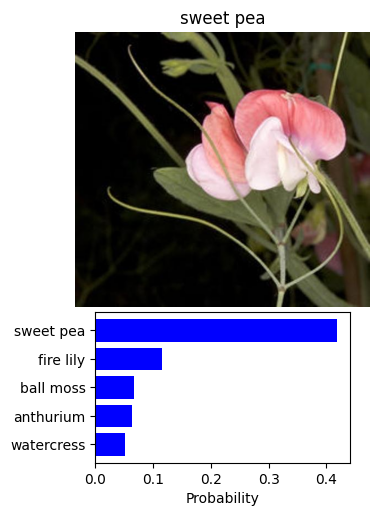

In [68]:
# Sanity Checking
def check_sanity(img_path):
    prob, classes = predict(img_path, pretrained_model)
    max_index = np.argmax(prob)
    max_probability = prob[max_index]
    label = classes[max_index]

    fig = plt.figure(figsize=(6,6))
    ax1 = plt.subplot2grid((15,9), (0,0), colspan=9, rowspan=9)
    ax2 = plt.subplot2grid((15,9), (9,2), colspan=5, rowspan=5)

    image = Image.open(img_path)
    ax1.axis('off')
    ax1.set_title(cat_to_name[label])
    ax1.imshow(image)

    labels = []
    for cl in classes:
        labels.append(cat_to_name[cl])

    y_pos = np.arange(5)
    ax2.set_yticks(y_pos)
    ax2.set_yticklabels(labels)
    ax2.set_xlabel('Probability')
    ax2.invert_yaxis()
    ax2.barh(y_pos, prob, xerr=0, align='center', color='blue')

    plt.show()

check_sanity('./flowers/test/4/image_05678.jpg')

In [71]:
!jupyter nbconvert mynotebook.ipynb --to html

[NbConvertApp] WARNING | pattern 'mynotebook.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    